Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0
Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 0.3739 - accuracy: 0.9029 - val_loss: 0.4362 - val_accuracy: 0.8404
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3417 - accuracy: 0.9186 - val_loss: 0.4133 - val_accuracy: 0.8457
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3143 - accuracy: 0.9344 - val_loss: 0.3945 - val_accuracy: 0.8457
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.9449 - val_loss: 0.3786 - val_accuracy: 0.8511
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 0.2724 - accuracy: 0.9528 - val_loss: 0.3641 - val_accuracy: 0.8670
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.2559 - accuracy: 0.9528 - val_loss: 0.3515 - val_accuracy: 0.8723
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 

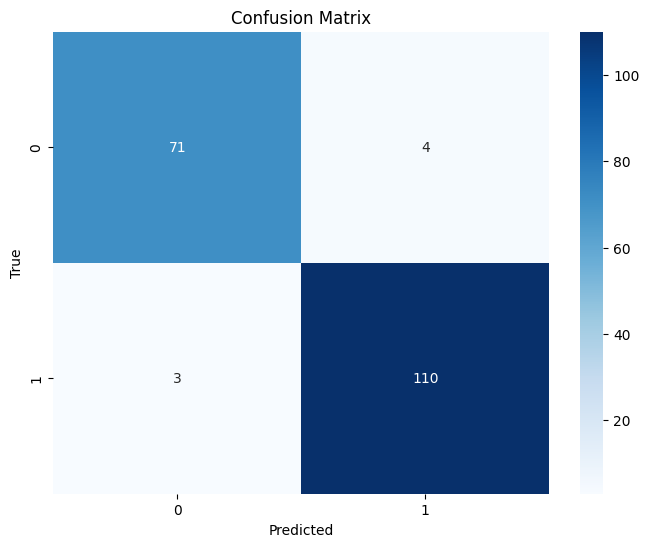

In [11]:
try:
  %tensorflow_version 2.9
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
#load in the data

from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data
type(data)
data.keys()
# q
data.target
data.target_names
data.target.shape
data.data
data.feature_names
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data.data,data.target,test_size=0.33 )
N, D=X_train.shape
N,D
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=100)
print("Train score: ",model.evaluate(X_train,Y_train))
print("Train score: ",model.evaluate(X_test,Y_test))





from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for test set
Y_pred = model.predict(X_test).round()

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
